In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [67]:
df = pd.read_csv('Concrete.csv', engine = 'python')
df.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## train/ valid/ test 데이터 셋 분할

In [68]:
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)

In [69]:
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

In [70]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
valid data X size : (309, 8)
valid data Y size : (309,)
test data X size : (309, 8)
test data Y size : (309,)


# 의사결정나무

### min_samples_leaf Parameter 조정

In [71]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.994533,0.786529
1,2,0.975482,0.785601
2,3,0.949434,0.787025
3,4,0.931813,0.775432
4,5,0.910157,0.803064
5,6,0.893789,0.784200
6,7,0.881995,0.768548
7,8,0.872461,0.763805
8,9,0.846137,0.747909
9,10,0.837137,0.751115


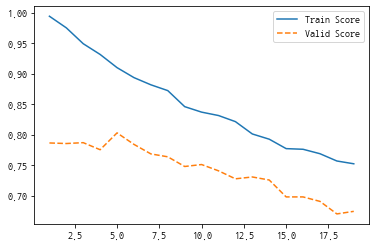

In [72]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle = '--', label = "Valid Score")
plt.legend()

min_samples_leaf의 값이 5인 경우 Valid score값과 Train score값의 차이가 가장 작기 때문에 5로 min_samples_leaf를 지정

In [73]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(1,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5, 
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,2,0.910,0.803
1,4,0.910,0.803
2,6,0.910,0.803
3,8,0.910,0.803
4,10,0.910,0.803
5,12,0.903,0.805
6,14,0.889,0.782
7,16,0.886,0.784
8,18,0.872,0.770
9,20,0.864,0.756


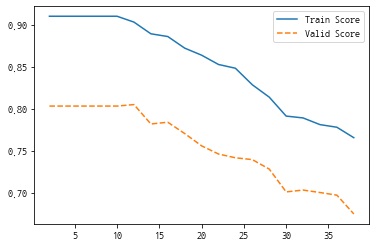

In [74]:
plt.plot(para_split, train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split, valid_score, linestyle = '--', label = "Valid Score")
plt.legend()

min_samples_split의 값이 12인 경우 Valid score값과 Train score값의 차이가 가장 작으므로 12로 min_samples_split를 지정

In [75]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5, 
                                 min_samples_split = 12, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.237,0.299
1,2,0.455,0.484
2,3,0.646,0.588
3,4,0.752,0.684
4,5,0.833,0.732
5,6,0.885,0.792
6,7,0.897,0.794
7,8,0.901,0.799
8,9,0.903,0.805
9,10,0.903,0.805


Depth가 9일때부터 Trainscore와 Validscore의 차이가 가장 작으므로 Depth를 9로 지정!

## 최종 모델 선정

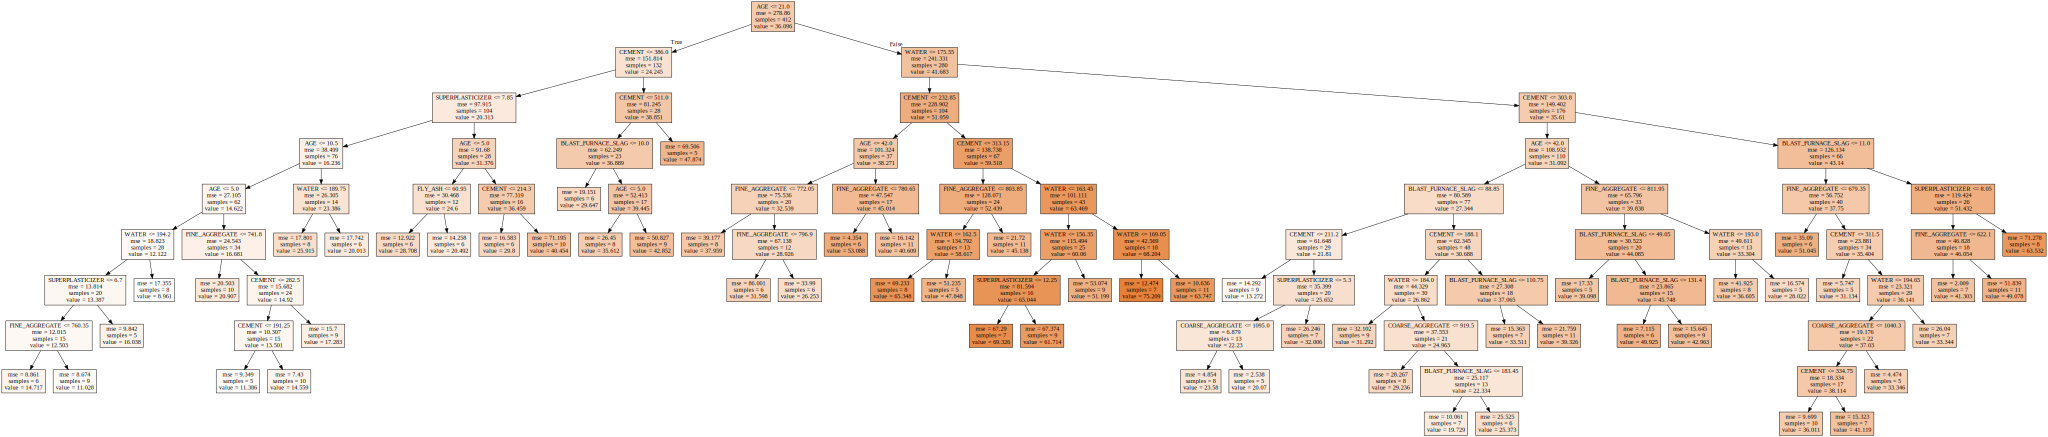

In [76]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 12, max_depth = 9, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_final, out_file = "tree_split.dot",
               feature_names = v_feature_name, impurity=True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## 설명변수의 중요도

In [77]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.334
0,CEMENT,0.285
3,WATER,0.208
4,SUPERPLASTICIZER,0.068
1,BLAST_FURNACE_SLAG,0.052
6,FINE_AGGREGATE,0.047
5,COARSE_AGGREGATE,0.003
2,FLY_ASH,0.002


Text(0, 0.5, '변수')

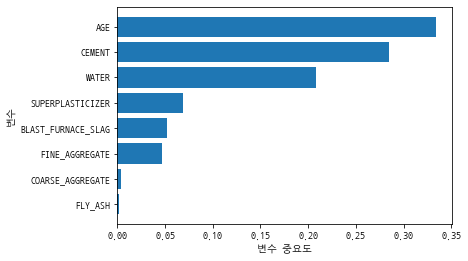

In [78]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

AGE, CEMENT, WATER 변수가 콘크리트 강도에 크게 영향을 미친다고 할 수 있다. 

### test set의 결정계수

In [95]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.903
Score on test set: 0.792


test set의 결정 계수 79.2%로 valid set의 결정계수 80.5%와 큰 차이가 없는 것으로 보아 선택한 파라미터 값들이 적절했다고 생각한다.

### 의사결정나무 Test set 예측 결과 / MSE /MAE

In [79]:
result_y = tree_final.predict(df_test_x)
mean_squared_error(df_test_y,result_y)

58.97483017681843

In [80]:
mean_absolute_error(df_test_y,result_y)

5.844827169055324

# 랜덤포레스트

In [81]:
from sklearn.ensemble import RandomForestRegressor

## n_estimators Parameter 조정

In [82]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.962,0.865
1,20,0.970,0.878
2,30,0.972,0.884
3,40,0.974,0.886
4,50,0.973,0.886
5,60,0.973,0.888
6,70,0.973,0.889
7,80,0.973,0.888
8,90,0.974,0.889
9,100,0.974,0.889


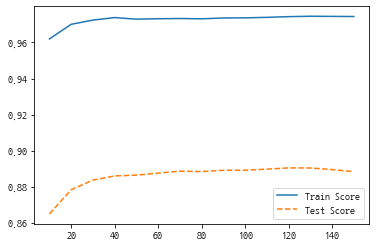

In [83]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, valid_score, linestyle='--', label = "Test Score")
plt.legend()

n_estimator의 값이 70일 때 처음으로 train과 valid의 결정계수 차이가 가장 작으므로 n_estimator을 70으로 지정

## min_samples_leaf Parameter 조정

In [55]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 70,
                                 min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.973258,0.888672
1,2,0.957342,0.882795
2,3,0.939137,0.873287
3,4,0.922034,0.863343
4,5,0.905346,0.852928
5,6,0.889869,0.841685
6,7,0.875436,0.831443
7,8,0.861928,0.819967
8,9,0.848749,0.810045
9,10,0.837848,0.802128


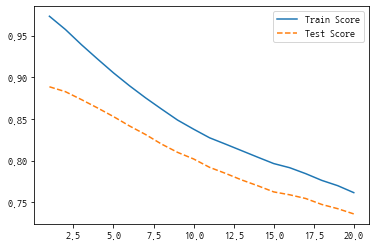

In [56]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle='--', label = "Test Score")
plt.legend()

min_samples_leaf는 7이상부터 두 값의 차이가 비슷하므로 7로 지정

## min_samples_split Parameter 조정

In [64]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(6,15)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 70,min_samples_leaf = 7, 
                                 min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,12,0.875,0.831
1,14,0.875,0.831
2,16,0.870,0.826
3,18,0.862,0.819
4,20,0.853,0.812
5,22,0.845,0.804
6,24,0.839,0.799
7,26,0.831,0.793
8,28,0.825,0.786


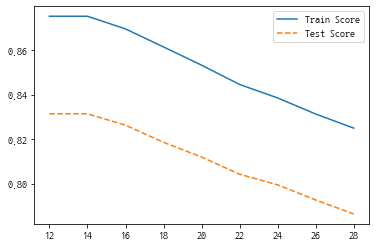

In [65]:
plt.plot(para_split, train_score, linestyle='-', label = "Train Score")
plt.plot(para_split, valid_score, linestyle='--', label = "Test Score")
plt.legend()

min_samples_split의 값이 14이상부터 Trainscore와 Testscore의 차이가 비슷하므로 14로 지정 

## depth Parameter 조정

In [84]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 70, min_samples_leaf = 7, 
                                 min_samples_split = 14, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.342,0.363
1,2,0.597,0.608
2,3,0.732,0.709
3,4,0.811,0.776
4,5,0.853,0.816
5,6,0.871,0.829
6,7,0.875,0.831
7,8,0.875,0.831
8,9,0.875,0.831
9,10,0.875,0.831


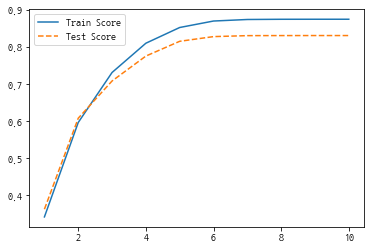

In [86]:
plt.plot(para_depth, train_score, linestyle='-', label = "Train Score")
plt.plot(para_depth, valid_score, linestyle='--', label = "Test Score")
plt.legend()

Depth가 7이상부터 두값의 차이가 일정하므로 7을 Depth로 지정!

## 최종 모델 생성

In [87]:
v_feature_name = df_train_x.columns
rf_final = RandomForestRegressor(n_estimators = 70, min_samples_leaf = 7, min_samples_split = 14, max_depth = 7, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on valid set: {:.3f}".format(rf_final.score(df_valid_x, df_valid_y)))

Score on training set: 0.875
Score on valid set: 0.831


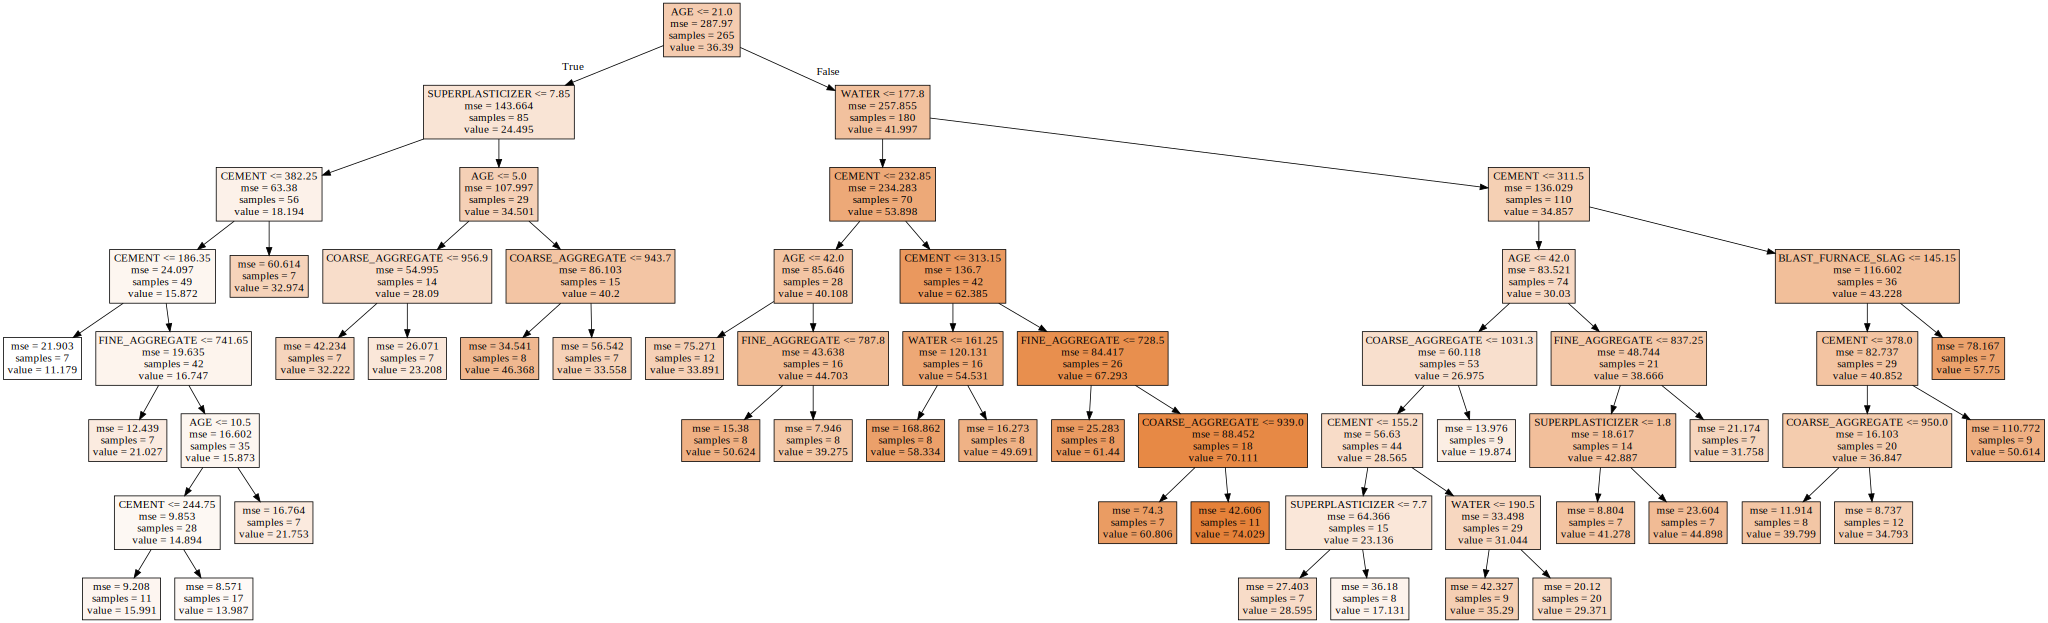

In [88]:
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot", feature_names = v_feature_name, impurity = True, filled = True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## 변수중요도

In [89]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.361
0,CEMENT,0.298
3,WATER,0.179
4,SUPERPLASTICIZER,0.055
1,BLAST_FURNACE_SLAG,0.051
6,FINE_AGGREGATE,0.038
5,COARSE_AGGREGATE,0.012
2,FLY_ASH,0.005


Text(0, 0.5, '변수')

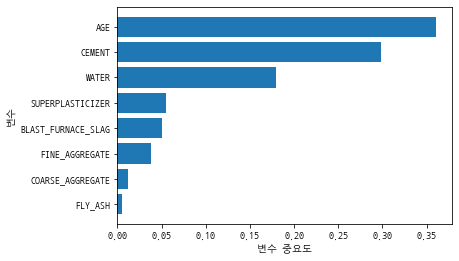

In [90]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

의사결정나무의 변수중요도와 비슷하게 AGE, CEMENT, WATER 변수가 다른 변수들에 비해 콘크리트의 강도에 크게 영향을 미친다.

### 랜덤포레스트 Test set 예측 결과 / MSE /MAE

In [92]:
result_y = rf_final.predict(df_test_x)
mean_squared_error(df_test_y,result_y)

48.54654465578386

In [93]:
result_y = rf_final.predict(df_test_x)
mean_absolute_error(df_test_y,result_y)

5.5961526426901615

랜덤포레스트의 test set예측 결과인 result_y와 실제 test y의 MSE, MAE는 의사결정나무의 값들보다 낮게 나왔으므로 랜덤포레스트의 모델이 더 나은 모델이다.

### test set의 결정계수

In [96]:
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.875
Score on test set: 0.829


test set의 결정 계수 82.9%로 valid set의 결정계수 83.1%와 큰 차이가 없는 것으로 보아 선택한 파라미터 값들이 적절했다고 생각한다.